# Set up

## Package Loading

In [1]:
import numpy as np 
import pandas as pd 
!pip install fasttext
import fasttext
import bz2
import csv
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.model_selection import train_test_split
import time
import seaborn as sns


[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Set up paths

In [2]:
path_data = '../../../../data/external/Harmful_and_Cyberbullying/data.csv'
path_train = 'train_text.txt'
path_test = 'test_text.txt'
path_valid = 'valid_text.txt'

## Set up functions

In [3]:
def convert_labels(label):
  label = int(label)
  if label == 1:
    return '__label__1'
  else:
    return '__label__0'

#  Train Test split and Data Preparation

In [4]:
df = pd.read_csv(path_data)
df['text'] = df['tweet']
df.drop(columns=['tweet'], inplace = True)
df['label'] = df['label'].apply(convert_labels)
print(df.head())

train, test = train_test_split(df, test_size=0.2, random_state = 453, stratify=df['label'])
test, valid = train_test_split(test, test_size=0.5 , random_state = 453, stratify= test['label'])

        label                                               text
0  __label__0  In other words #katandandre, your food was cra...
1  __label__0  Why is #aussietv so white? #MKR #theblock #ImA...
2  __label__0  @XochitlSuckkks a classy whore? Or more red ve...
3  __label__0  @Jason_Gio meh. :P  thanks for the heads up, b...
4  __label__0  @RudhoeEnglish This is an ISIS account pretend...


# Transformation to txt

In [5]:
train.to_csv(path_train, index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")
valid.to_csv(path_valid, index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")
test_labels = []
test_list = []
for index, row in test.iterrows():
    test_list.append(row['text'])
    test_labels.append(row['label'])

# Modeling

In [6]:
model = fasttext.train_supervised(path_train, label_prefix='__label__', thread=4, epoch = 10)
#model = fasttext.train_supervised(input=path_train, autotuneValidationFile=path_valid, autotuneDuration=600)
print(model.labels, 'are the labels or targets the model is predicting')

['__label__1', '__label__0'] are the labels or targets the model is predicting


# Prediction

In [7]:
test_list = [w.replace('\n', '') for w in test_list]

# Use the predict function 
pred = model.predict(test_list)

# check the first record outputs
print(pred[0][0], 'is the predicted label')

['__label__0'] is the predicted label


In [8]:
labels = [0 if x.split(' ')[0] == '__label__0' else 1 for x in test_labels]
pred_labels = [0 if x == ['__label__0'] else 1 for x in pred[0]]

# run the accuracy measure. 
print(roc_auc_score(labels, pred_labels))
print(f1_score(labels, pred_labels))

0.8817379893576562
0.8871315600287564


## Predict oscar data 

In [9]:
path_oscar_en_1gb = path_oscar_1gb_eng = '../../../../data/raw/Oscar_data/en_meta_part_1.jsonl'

In [10]:
df_en = pd.read_json(path_oscar_1gb_eng, lines=True)
df_en

,content,warc_headers,metadata
0,Botany 2013 - Phylogenetic relationships in Br...,"{'content-length': '3090', 'warc-record-id': '...","{'identification': {'label': 'en', 'prob': 0.6..."
1,HOW EXACTLY TO MEET SHEMALES Meeting shemales ...,{'warc-refers-to': '<urn:uuid:0244a561-2fe4-40...,"{'identification': {'label': 'en', 'prob': 0.7..."
2,Message (778) 294-7737Call (778) 294-7737Get d...,"{'content-length': '1498', 'warc-block-digest'...","{'identification': {'label': 'en', 'prob': 0.6..."
3,Aarambh India FX is a premier name in the real...,"{'content-length': '1397', 'warc-type': 'conve...","{'identification': {'label': 'en', 'prob': 0.9..."
4,"First described over 100 years ago, B. megater...",{'warc-block-digest': 'sha1:GOX4ZR3A4AO56LTX2X...,"{'identification': {'label': 'en', 'prob': 0.6..."
...,...,...,...
137116,In order to take full advantage of the feature...,{'warc-target-uri': 'https://www.chevytalk.org...,"{'identification': {'label': 'en', 'prob': 0.9..."
137117,"Cookies are used for measurement, ads and opti...",{'warc-target-uri': 'https://www.cheyenne.org/...,"{'identification': {'label': 'en', 'prob': 0.9..."
137118,Pediatric dentists practice cosmetic dentistry...,"{'content-type': 'text/plain', 'content-length...","{'identification': {'label': 'en', 'prob': 0.9..."
137119,Local and national studies demonstrate the nee...,{'warc-target-uri': 'https://www.chicagosfoodb...,"{'identification': {'label': 'en', 'prob': 0.8..."


In [11]:
df_en.drop(columns="warc_headers", inplace=True)
df_en.drop(columns="metadata", inplace=True)
df_en

,content
0,Botany 2013 - Phylogenetic relationships in Br...
1,HOW EXACTLY TO MEET SHEMALES Meeting shemales ...
2,Message (778) 294-7737Call (778) 294-7737Get d...
3,Aarambh India FX is a premier name in the real...
4,"First described over 100 years ago, B. megater..."
...,...
137116,In order to take full advantage of the feature...
137117,"Cookies are used for measurement, ads and opti..."
137118,Pediatric dentists practice cosmetic dentistry...
137119,Local and national studies demonstrate the nee...


In [12]:
# predicting 
test_list = []
for index, row in df_en.iterrows():
    test_list.append(row['content'])
test_list = [w.replace('\n', '') for w in test_list]

start_time = time.time()

# Use the predict function 
pred = model.predict(test_list)

# measure time 
end_time = time.time()
measured_time = end_time - start_time
print("--- The predicting took: %s seconds ---" % (measured_time))


--- The predicting took: 28.765512943267822 seconds ---


In [13]:
prediction = pd.DataFrame(pred[0], columns=['Label'])
prediction

,Label
0,__label__1
1,__label__1
2,__label__0
3,__label__1
4,__label__1
...,...
137116,__label__1
137117,__label__1
137118,__label__0
137119,__label__0


In [14]:
concat = pd.concat([df_en, prediction], axis=1)
concat

,content,Label
0,Botany 2013 - Phylogenetic relationships in Br...,__label__1
1,HOW EXACTLY TO MEET SHEMALES Meeting shemales ...,__label__1
2,Message (778) 294-7737Call (778) 294-7737Get d...,__label__0
3,Aarambh India FX is a premier name in the real...,__label__1
4,"First described over 100 years ago, B. megater...",__label__1
...,...,...
137116,In order to take full advantage of the feature...,__label__1
137117,"Cookies are used for measurement, ads and opti...",__label__1
137118,Pediatric dentists practice cosmetic dentistry...,__label__0
137119,Local and national studies demonstrate the nee...,__label__0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


__label__1    0.734942
__label__0    0.265058
Name: Label, dtype: float64


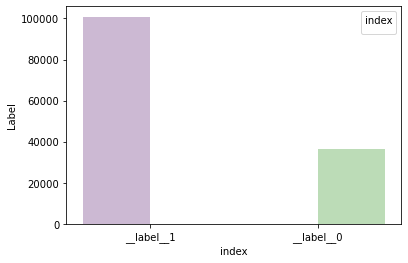

In [15]:
sns.barplot( x='index',y='Label', hue='index', 
            data=pd.DataFrame(concat['Label'].value_counts()).reset_index(), 
            palette="PRGn")
print(concat.Label.value_counts()/len(concat))